# 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


# 2. Define Paths and Parameters:

In [3]:
train_dir = '/content/drive/MyDrive/Text image Dataset/train'
val_dir = '/content/drive/MyDrive/Text image Dataset/test'
batch_size = 32
img_size = (96,96)

# 3. Using ImageDataGenerator for Data Augmentation and Preprocessing:

In [4]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    validation_split=0.2,
    fill_mode='nearest',)

In [5]:
train_generator = datagen.flow_from_directory(train_dir, target_size=img_size,batch_size=batch_size,subset='training')
valid_generator = datagen.flow_from_directory(train_dir, target_size=img_size,batch_size=batch_size,subset='validation')

Found 10345 images belonging to 12 classes.
Found 2581 images belonging to 12 classes.


# 4. Plot Sample Images:

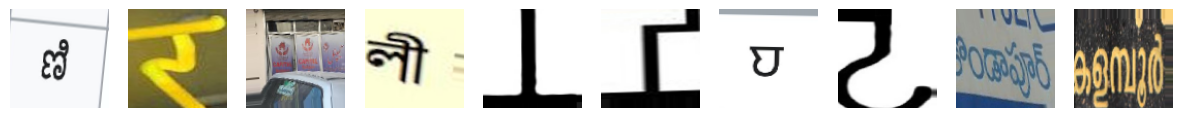

In [6]:
def plot_samples(generator, num_samples=10):
    x_batch, y_batch = next(generator)
    plt.figure(figsize=(15, 3))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(x_batch[i])
        plt.axis('off')
    plt.show()

# Plot some samples from the training set
plot_samples(train_generator)

# 5. Load Pre-trained MobileNet Model and Add Custom Layers::



In [7]:
# Build the model
basemodel = MobileNetV2(weights='imagenet',include_top = False)

x = basemodel.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(12,activation='softmax')(x)

model = Model(inputs= basemodel.input, outputs=predictions)

9406464/9406464 [==============================] - 0s 0us/step


# 6. Print the Summary of this Model:

In [8]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, None, None, 32)       128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, None, None, 32)       0         ['bn_Conv1[0][0]']        

# 7. Freeze the layers of the base model

In [9]:
for layer in model.layers[:100]:
  layer.trainnable = False

In [13]:
epochs = 5
optimizer = Adam(learning_rate=0.001)

model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

In [14]:
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=epochs,
    )

Epoch 1/5
324/324 [==============================] - 104s 255ms/step - loss: 0.4583 - accuracy: 0.8719 - val_loss: 5.3221 - val_accuracy: 0.5633
Epoch 2/5
324/324 [==============================] - 80s 248ms/step - loss: 0.2628 - accuracy: 0.9213 - val_loss: 16.9954 - val_accuracy: 0.4727
Epoch 3/5
324/324 [==============================] - 80s 246ms/step - loss: 0.2331 - accuracy: 0.9333 - val_loss: 16.2173 - val_accuracy: 0.4580
Epoch 4/5
324/324 [==============================] - 79s 242ms/step - loss: 0.1857 - accuracy: 0.9445 - val_loss: 4.1269 - val_accuracy: 0.6397
Epoch 5/5
324/324 [==============================] - 81s 250ms/step - loss: 0.1967 - accuracy: 0.9417 - val_loss: 49.5111 - val_accuracy: 0.5424


In [15]:
test_loss, test_acc = model.evaluate(valid_generator, verbose=2)
print('Validation accuracy:', test_acc)

81/81 - 15s - loss: 48.5611 - accuracy: 0.5440 - 15s/epoch - 180ms/step
Validation accuracy: 0.5439751744270325
